# indoor thermal environment figure
- This script is used to visualize TBUILD, AC, HEAT reduction with latitude;
- Simulations: CNTL, ROOF_DA, IMPRAOD_DA, WALL_DA, ROOF_WALL_DA, ROOF_IMPROAD_WALL_DA;

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

In [2]:
home_path = '/work/n02/n02/yuansun/'
#case0
path_0 = home_path + 'cesm/archive/case0/lnd/hist/'
#case2
path_2 = home_path + 'cesm/archive/case2/lnd/hist/'
#case3
path_3 = home_path + 'cesm/archive/case3/lnd/hist/'
#case4
path_4 = home_path + 'cesm/archive/case4/lnd/hist/'
#case5
path_5 = home_path + 'cesm/archive/case5/lnd/hist/'
#case6
path_6 = home_path + 'cesm/archive/case6/lnd/hist/'
# surface
sfile = home_path + 'cesm/cesm_inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr1850_c190214.nc'

In [3]:
ds_0 = xr.open_dataset(sfile)
mask = np.any(ds_0['PCT_URBAN'] != 0, axis=0)
mask = mask.rename({'lsmlat': 'lat', 'lsmlon': 'lon'})

In [4]:
# 2041 case0 file
clm_2040_c0 = 'case0.clm2.h1.2040-02-01-00000.nc'
clm_2041_c0 = 'case0.clm2.h1.2041-02-01-00000.nc'
ds_2040_c0 = xr.open_dataset(path_0 + clm_2040_c0)
ds_2041_c0 = xr.open_dataset(path_0 + clm_2041_c0)

lat = ds_2040_c0['lat']
lon = ds_2040_c0['lon']

fsa_0 = (ds_2040_c0['TBUILD'].where(mask).mean(['time','lon']))  
fsa_0_jja = ds_2040_c0['TBUILD'][6:9,:,:].where(mask).mean(['time','lon'])
fsa_0_djf = xr.concat([ds_2040_c0['TBUILD'].isel(time=11),ds_2041_c0['TBUILD'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

ac_0 = (ds_2040_c0['URBAN_AC'].where(mask).mean(['time','lon']))  
ac_0_jja = ds_2040_c0['URBAN_AC'][6:9,:,:].where(mask).mean(['time','lon'])
ac_0_djf = xr.concat([ds_2040_c0['URBAN_AC'].isel(time=11),ds_2041_c0['URBAN_AC'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

heat_0 = (ds_2040_c0['URBAN_HEAT'].where(mask).mean(['time','lon']))  
heat_0_jja = ds_2040_c0['URBAN_HEAT'][6:9,:,:].where(mask).mean(['time','lon'])
heat_0_djf = xr.concat([ds_2040_c0['URBAN_HEAT'].isel(time=11),ds_2041_c0['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

In [5]:
clm_2040_c2 = 'case2.clm2.h1.2040-02-01-00000.nc'
clm_2041_c2 = 'case2.clm2.h1.2041-02-01-00000.nc'
ds_2040_c2 = xr.open_dataset(path_2 + clm_2040_c2)
ds_2041_c2 = xr.open_dataset(path_2 + clm_2041_c2)

fsa_2 = (ds_2040_c2['TBUILD'].where(mask).mean(['time','lon']))  
fsa_2_jja = ds_2040_c2['TBUILD'][6:9,:,:].where(mask).mean(['time','lon'])
fsa_2_djf = xr.concat([ds_2040_c2['TBUILD'].isel(time=11),
                       ds_2041_c2['TBUILD'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

ac_2 = (ds_2040_c2['URBAN_AC'].where(mask).mean(['time','lon']))  
ac_2_jja = ds_2040_c2['URBAN_AC'][6:9,:,:].where(mask).mean(['time','lon'])
ac_2_djf = xr.concat([ds_2040_c2['URBAN_AC'].isel(time=11),ds_2041_c2['URBAN_AC'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

heat_2 = (ds_2040_c2['URBAN_HEAT'].where(mask).mean(['time','lon']))  
heat_2_jja = ds_2040_c2['URBAN_HEAT'][6:9,:,:].where(mask).mean(['time','lon'])
heat_2_djf = xr.concat([ds_2040_c2['URBAN_HEAT'].isel(time=11),ds_2041_c2['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

In [6]:
clm_2040_c3 = 'case3.clm2.h1.2040-02-01-00000.nc'
clm_2041_c3 = 'case3.clm2.h1.2041-02-01-00000.nc'
ds_2040_c3 = xr.open_dataset(path_3 + clm_2040_c3)
ds_2041_c3 = xr.open_dataset(path_3 + clm_2041_c3)

fsa_3 = (ds_2040_c3['TBUILD'].where(mask).mean(['time','lon']))  
fsa_3_jja = ds_2040_c3['TBUILD'][6:9,:,:].where(mask).mean(['time','lon'])
fsa_3_djf = xr.concat([ds_2040_c3['TBUILD'].isel(time=11),
                       ds_2041_c3['TBUILD'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon']) 

ac_3 = (ds_2040_c3['URBAN_AC'].where(mask).mean(['time','lon']))  
ac_3_jja = ds_2040_c3['URBAN_AC'][6:9,:,:].where(mask).mean(['time','lon'])
ac_3_djf = xr.concat([ds_2040_c3['URBAN_AC'].isel(time=11),ds_2041_c3['URBAN_AC'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

heat_3 = (ds_2040_c3['URBAN_HEAT'].where(mask).mean(['time','lon']))  
heat_3_jja = ds_2040_c3['URBAN_HEAT'][6:9,:,:].where(mask).mean(['time','lon'])
heat_3_djf = xr.concat([ds_2040_c3['URBAN_HEAT'].isel(time=11),ds_2041_c3['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

In [7]:
clm_2040_c4 = 'case4.clm2.h1.2040-02-01-00000.nc'
clm_2041_c4 = 'case4.clm2.h1.2041-02-01-00000.nc'
ds_2040_c4 = xr.open_dataset(path_4 + clm_2040_c4)
ds_2041_c4 = xr.open_dataset(path_4 + clm_2041_c4)

fsa_4 = (ds_2040_c4['TBUILD'].where(mask).mean(['time','lon']))  
fsa_4_jja = ds_2040_c4['TBUILD'][6:9,:,:].where(mask).mean(['time','lon'])
fsa_4_djf = xr.concat([ds_2040_c4['TBUILD'].isel(time=11),
                       ds_2041_c4['TBUILD'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon']) 

ac_4 = (ds_2040_c4['URBAN_AC'].where(mask).mean(['time','lon']))  
ac_4_jja = ds_2040_c4['URBAN_AC'][6:9,:,:].where(mask).mean(['time','lon'])
ac_4_djf = xr.concat([ds_2040_c4['URBAN_AC'].isel(time=11),ds_2041_c4['URBAN_AC'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

heat_4 = (ds_2040_c4['URBAN_HEAT'].where(mask).mean(['time','lon']))  
heat_4_jja = ds_2040_c4['URBAN_HEAT'][6:9,:,:].where(mask).mean(['time','lon'])
heat_4_djf = xr.concat([ds_2040_c4['URBAN_HEAT'].isel(time=11),ds_2041_c4['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

In [8]:
clm_2040_c5 = 'case5.clm2.h1.2040-02-01-00000.nc'
clm_2041_c5 = 'case5.clm2.h1.2041-02-01-00000.nc'
ds_2040_c5 = xr.open_dataset(path_5 + clm_2040_c5)
ds_2041_c5 = xr.open_dataset(path_5 + clm_2041_c5)

fsa_5 = (ds_2040_c5['TBUILD'].where(mask).mean(['time','lon']))  
fsa_5_jja = ds_2040_c5['TBUILD'][6:9,:,:].where(mask).mean(['time','lon'])
fsa_5_djf = xr.concat([ds_2040_c5['TBUILD'].isel(time=11),
                       ds_2041_c5['TBUILD'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon']) 

ac_5 = (ds_2040_c5['URBAN_AC'].where(mask).mean(['time','lon']))  
ac_5_jja = ds_2040_c5['URBAN_AC'][6:9,:,:].where(mask).mean(['time','lon'])
ac_5_djf = xr.concat([ds_2040_c5['URBAN_AC'].isel(time=11),ds_2041_c5['URBAN_AC'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

heat_5 = (ds_2040_c5['URBAN_HEAT'].where(mask).mean(['time','lon']))  
heat_5_jja = ds_2040_c5['URBAN_HEAT'][6:9,:,:].where(mask).mean(['time','lon'])
heat_5_djf = xr.concat([ds_2040_c5['URBAN_HEAT'].isel(time=11),ds_2041_c5['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

In [9]:
clm_2040_c6 = 'case6.clm2.h1.2040-02-01-00000.nc'
clm_2041_c6 = 'case6.clm2.h1.2041-02-01-00000.nc'
ds_2040_c6 = xr.open_dataset(path_6 + clm_2040_c6)
ds_2041_c6 = xr.open_dataset(path_6 + clm_2041_c6)

fsa_6 = (ds_2040_c6['TBUILD'].where(mask).mean(['time','lon']))  
fsa_6_jja = ds_2040_c6['TBUILD'][6:9,:,:].where(mask).mean(['time','lon'])
fsa_6_djf = xr.concat([ds_2040_c6['TBUILD'].isel(time=11),
                       ds_2041_c6['TBUILD'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon']) 

ac_6 = (ds_2040_c6['URBAN_AC'].where(mask).mean(['time','lon']))  
ac_6_jja = ds_2040_c6['URBAN_AC'][6:9,:,:].where(mask).mean(['time','lon'])
ac_6_djf = xr.concat([ds_2040_c6['URBAN_AC'].isel(time=11),ds_2041_c6['URBAN_AC'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

heat_6 = (ds_2040_c6['URBAN_HEAT'].where(mask).mean(['time','lon']))  
heat_6_jja = ds_2040_c6['URBAN_HEAT'][6:9,:,:].where(mask).mean(['time','lon'])
heat_6_djf = xr.concat([ds_2040_c6['URBAN_HEAT'].isel(time=11),ds_2041_c6['URBAN_HEAT'].isel(time=slice(0, 2))], dim='time').where(mask).mean(['time','lon'])

In [10]:
# drawing
start_year = 2015
end_year = 2040
linewidth = 0.5
linewidth2 = 1
fontsize = 6
labelfont = 6
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#1235b6'
lc9 = '#05101f'
lc10 = '#952cc6'
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2040]
alpha=0.075
handletextpad = 0.5
pad = 1
padt = 0.5
length = 4
xwidth = 0.75
length = 4
padding = 4

proj = ccrs.PlateCarree()
zon = 31
zon2 = 17
linewidth2 = 0.01
linestyle='dashed'
alpha2 = 0.25
t = [['(a) TBUILD - ANN','(b) TBUILD - JJA','(c) TBUILD - DJF'],
     ['(d) AC - ANN','(e) AC - JJA','(f) AC - DJF'],
     ['(g) HEAT - ANN','(h) HEAT - JJA','(i) HEAT - DJF']]
lsmlat = ds_0['LATIXY'][:,0]
l = ['CNTL', 'ROOF_DA', 'IMPROAD_DA', 'WALL_DA']
lc = [lc9, lc1, lc3, lc7, lc4, lc10]

data1 = [[[fsa_2-fsa_0, fsa_3-fsa_0, fsa_5-fsa_0, fsa_4-fsa_0, fsa_6-fsa_0],
         [fsa_2_jja-fsa_0_jja, fsa_3_jja-fsa_0_jja, fsa_5_jja-fsa_0_jja, fsa_4_jja-fsa_0_jja, fsa_6_jja-fsa_0_jja],
         [fsa_2_djf-fsa_0_djf, fsa_3_djf-fsa_0_djf, fsa_5_djf-fsa_0_djf, fsa_4_djf-fsa_0_djf, fsa_6_djf-fsa_0_djf]],
         [[ac_2-ac_0, ac_3-ac_0, ac_5-ac_0, ac_4-ac_0, ac_6-ac_0],
         [ac_2_jja-ac_0_jja, ac_3_jja-ac_0_jja, ac_5_jja-ac_0_jja, ac_4_jja-ac_0_jja, ac_6_jja-ac_0_jja],
         [ac_2_djf-ac_0_djf, ac_3_djf-ac_0_djf, ac_5_djf-ac_0_djf, ac_4_djf-ac_0_djf, ac_6_djf-ac_0_djf]],
         [[heat_2-heat_0, heat_3-heat_0, heat_5-heat_0, heat_4-heat_0, heat_6-heat_0],
         [heat_2_jja-heat_0_jja, heat_3_jja-heat_0_jja, heat_5_jja-heat_0_jja, heat_4_jja-heat_0_jja, heat_6_jja-heat_0_jja],
         [heat_2_djf-heat_0_djf, heat_3_djf-heat_0_djf, heat_5_djf-heat_0_djf, heat_4_djf-heat_0_djf, heat_6_djf-heat_0_djf]]]

l1 = ['ROOF_DA minus CNTL', 'IMPROAD_DA minus CNTL', 'WALL_DA minus CNTL', 'ROOF_IMPROAD_DA minus CNTL', 'ROOF_IMPROAD_WALL_DA minus CNTL']
xmin = [-2.5, -0.02, -0.005]
xmax = [0.5, 0.005, 0.04]
xlabel = ['℃', 'W m⁻²', 'W m⁻²']
unitx = [0.9, 0.9, 0.9]

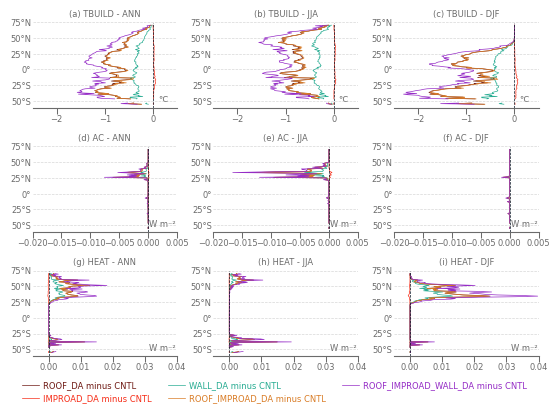

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(5.5, 4))

for i in range(3):
    for j in range(3):
        for m in range(5):
            axes[i,j].plot(data1[i][j][m][zon: 192-zon2], lsmlat[zon: 192-zon2], label=l1[m], linewidth=linewidth, color =lc[m+1])
        axes[i,j].plot(np.zeros(144), lsmlat[zon: 192-zon2], label=l1[m], linestyle=linestyle, linewidth=linewidth, color =lc[0])
        axes[i,j].set_title(t[i][j],fontsize=fontsize,color=labelcolor, pad = padding)
        axes[i,j].set_xlim(xmin[i], xmax[i])
        axes[i,j].set_ylim(lsmlat[zon], 75)
        ticks = np.arange(-50, 76, 25)
        axes[i,j].set_yticks(ticks)
        axes[i,j].set_xlabel(xlabel[i], labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
        axes[i,j].xaxis.set_label_coords(unitx[i], 0.15)
        axes[i,j].spines['left'].set_visible(False)
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].spines['bottom'].set_color(labelcolor)
        axes[i,j].set_yticklabels(['50°S','25°S', '0°', '25°N', '50°N','75°N'])
        axes[i,j].grid(True, which='major', axis='y',linestyle='--',linewidth=0.5, alpha=0.5)
        axes[i,j].tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = 0)
        axes[i,j].tick_params(axis='x', which='major', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        axes[i,j].tick_params(axis='x', which='minor', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length/2)
       # axes[i,j].axvline(x=0, color=lc1, linestyle='--', linewidth=1)
plt.subplots_adjust(left=0.06, right=0.98, bottom=0.125, top=0.96, wspace=0.25, hspace= 0.45) 

lines, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(lines[0:5], labels[0:5], bbox_to_anchor=(0.5, -0.01), loc='lower center',frameon=False,handletextpad=handletextpad,fontsize=labelfont,ncol=3)

for i, text in enumerate(legend.get_texts()):
    text.set_color(lc[i+1])
    
fig.show()
fig.savefig('hete_lat.png', dpi=300)
fig.savefig('hete_lat.pdf', dpi=600)

## Description

In [16]:
print(lsmlat[zon].values)

-60.78534031413608


In [17]:
delta = fsa_2-fsa_0
index = delta.argmax()
print(index, delta[index])

<xarray.DataArray 'TBUILD' ()>
array(170) <xarray.DataArray 'TBUILD' ()>
array(-0.23510742, dtype=float32)
Coordinates:
    lat      float32 70.21


In [16]:
delta

<xarray.DataArray 'TBUILD' (lat: 192)>
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, -0.5739136 , -1.039978  , -0.8800659 ,
               nan, -1.2378235 ,         nan, -1.6333618 ,         nan,
               nan, -1.4423523 , -1.8915405 , -2.2687073 , -2.278595  ,
       -1.5993958 , -1.729248  , -1.854187  , -2.2899475 , -2.2131958 ,
       -1.9161682 , -2.1577759 , -2.1676636 , -2.073883  , -2.1000366 ,
       -2.1645508 , -1.9717712 , -2.0220337 , -1.915741  , -1.9345398 ,
       -2.242981  , -2.2076416 , -2.1263428 , -2.1004028 , -1.9127502 ,
       -1.967865  , -1.8688354 , -1.9094849 , -1.5261536 , -1.8241577 ,
       -1.7940063 , -2.3066711 , -2.1846619 , -1.6100769 , -1.2515869 ,
       -1.263092  , -1.1800842 , -2.4730835 , -2.2586365 , -2.2259827 ,
       -2.1525269 , -2.1226501 , -2.239746  , -2.3252869 , -2.6278381 ,
       -2.3720703 , -2.0307922 , -1.6946411 , -1.5119629 , -1.4393921 ,
       -1.580719  , -1.6026611 , -1.6200256 , -2.0397644 , -1.9128418 ,
       -2.2103577 , -2.3955383 , -2.6306152 , -2.5186768 , -2.6998901 ,
       -2.8212585 , -2.7519226 , -2.7829895 , -2.8283691 , -2.622589  ,
       -2.8086548 , -2.6315918 , -2.693756  , -2.6975098 , -2.7480164 ,
       -2.5284424 , -2.764618  , -2.8232117 , -2.8873901 , -2.784607  ,
       -2.7589111 , -2.7237244 , -2.6827087 , -2.7128296 , -2.543274  ,
       -2.5209045 , -2.3744812 , -1.9685974 , -1.898346  , -2.0740967 ,
       -1.8731995 , -1.688324  , -1.6848145 , -1.4618835 , -1.5398865 ,
       -1.5599976 , -1.4220581 , -1.3885803 , -1.4525146 , -1.4509888 ,
       -1.4528503 , -1.4996948 , -1.4026794 , -1.4169312 , -1.3781738 ,
       -1.397583  , -1.3885193 , -1.3179321 , -1.3501587 , -1.2252197 ,
       -1.1020203 , -0.99954224, -0.9616089 , -0.90045166, -0.7929077 ,
       -0.74295044, -0.70684814, -0.65838623, -0.70562744, -0.65478516,
       -0.5704346 , -0.6022339 , -0.5014343 , -0.4031372 , -0.41851807,
       -0.48931885, -0.39379883, -0.36102295, -0.29718018, -0.26260376,
       -0.23510742,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [55]:
print((fsa_2_jja-fsa_0_jja).mean(), (fsa_2_jja-fsa_0_jja).std())

<xarray.DataArray 'TBUILD' ()>
array(-0.7085902, dtype=float32) <xarray.DataArray 'TBUILD' ()>
array(0.2460804, dtype=float32)


In [56]:
print((fsa_2_djf-fsa_0_djf).mean(), (fsa_2_djf-fsa_0_djf).std())

<xarray.DataArray 'TBUILD' ()>
array(-0.70213574, dtype=float32) <xarray.DataArray 'TBUILD' ()>
array(0.5476287, dtype=float32)


In [62]:
delta = fsa_2_jja-fsa_0_jja
index = delta.argmax()
print(index, delta[index])

<xarray.DataArray 'TBUILD' ()>
array(37) <xarray.DataArray 'TBUILD' ()>
array(-0.03909302, dtype=float32)
Coordinates:
    lat      float32 -55.13


In [63]:
delta = fsa_2_jja-fsa_0_jja
index = delta.argmin()
print(index, delta[index])

<xarray.DataArray 'TBUILD' ()>
array(141) <xarray.DataArray 'TBUILD' ()>
array(-1.1507568, dtype=float32)
Coordinates:
    lat      float32 42.88


In [64]:
delta = fsa_2_djf-fsa_0_djf
index = delta.argmin()
print(index, delta[index])

<xarray.DataArray 'TBUILD' ()>
array(43) <xarray.DataArray 'TBUILD' ()>
array(-1.9808044, dtype=float32)
Coordinates:
    lat      float32 -49.48


In [66]:
print(ac_2.mean(), ac_0.mean())

<xarray.DataArray 'URBAN_AC' ()>
array(0.00093211, dtype=float32) <xarray.DataArray 'URBAN_AC' ()>
array(0.0012159, dtype=float32)


In [67]:
print(heat_2.mean()-heat_0.mean())

<xarray.DataArray 'URBAN_HEAT' ()>
array(0.00204434, dtype=float32)
